ORIE 4580:  Pseudorandom generators
=====
Sid Banerjee, Cornell

Notebook demonstrating how pseudorandom generators are used to generate $U[0,1]$


In [10]:
# Make sure we have the packages we need
import numpy as np
from scipy import stats
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

import seaborn as sns
sns.set_context("talk",font_scale=1, rc={"lines.linewidth": 2.5})

## Mid-Square Method

Function to generate pseudorandom numbers $(u_1,u_2,\ldots)\in[0,1]$ of $\ell$ decimal places, according to the mid-square method. For example, for $\ell=4$:
\begin{align*}
8234 \times 8234 &= 67(7987)56 \\
7987 \times 7987 &= 63(7921)69 \\
7921 \times 7921 &= 62(7422)41 \\
7422 \times 7422 &= 55(0860)84~ \ldots.
\end{align*}

Inputs: Length $n$, decimal places $\ell$, seed $x_0$.

See https://en.wikipedia.org/wiki/Middle-square_method for more details

In [6]:
def MidSquare(n,l = 4,x_0 = int((10**4-1)/7)):
    output = np.zeros(n)
    
    x = x_0
    for i in range(n):
        temp = x*x
        x = int(temp/(10**(l/2)))%(10.0**(l))
        output[i] = x/10**l

    return output

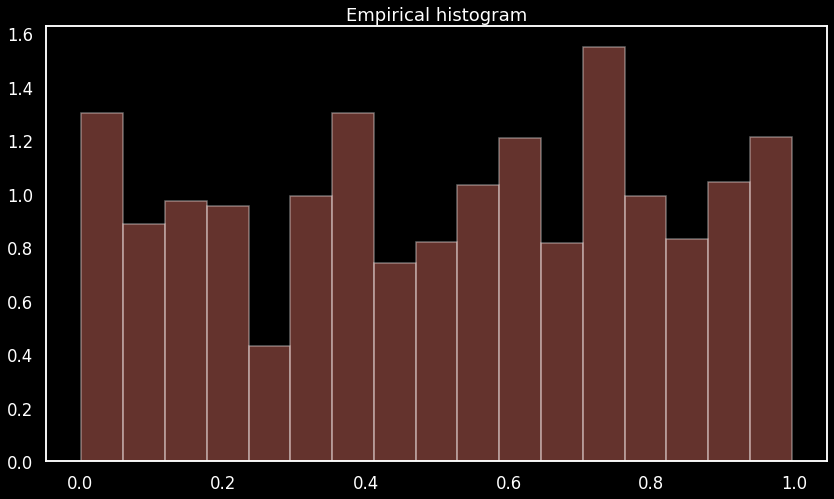

In [19]:
n = 5000

#X = MidSquare(n,l=4,x_0 = 8234)
X = MidSquare(n,l=6,x_0 = 125698)

plt.figure(figsize=(14,8))
sns.distplot(X,kde=False,norm_hist=True,color=cmap(3))

plt.title("Empirical histogram")
plt.show()

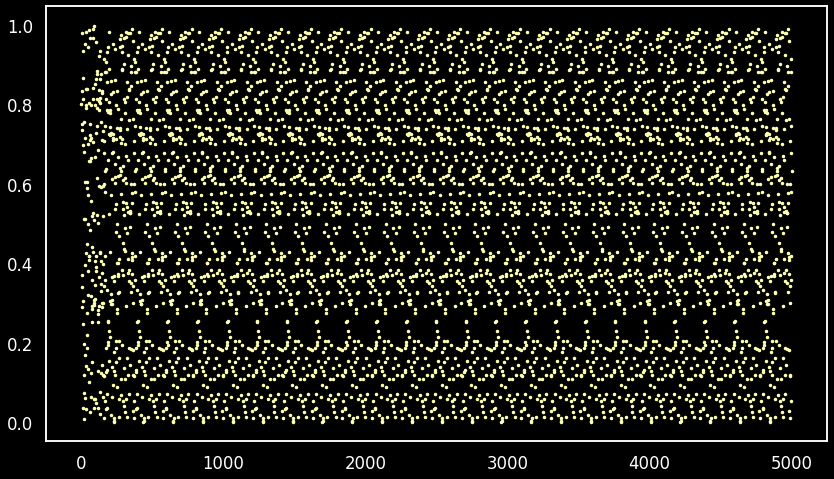

In [13]:
plt.figure(figsize=(14,8))
plt.scatter(np.arange(n)+1,X,s=4,color=cmap(1))
plt.show()

## Linear Congruential Generators

Function to generate pseudorandom numbers $(u_1,u_2,\ldots)$ according to:
\begin{align*}
    u_n &= \frac{x_n+1}{m+1} \\
	x_{n+1}  &=  (ax_n + c) \mbox{ mod }  m 
\end{align*}
Note: This returns $u_i\in\left\{\frac{1}{m+1},\frac{2}{m+1},\ldots,\frac{m}{m+1}\right\}$. If instead we use  $u_n = \frac{x_n}{m}$, then we get $u_i\in\left\{0,\frac{1}{m},\frac{2}{m},\ldots,\frac{m-1}{m}\right\}$

Inputs: Length $n$, modulus $m$, multiplier $a$, increment $c$, seed $x_0$

In [24]:
# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def LCG(n,m = 2**31-1,a = 1103515245,c = 12345, seed = 1):
    output = np.zeros(n)

    x = seed
    for i in range(n):
        output[i] = (x+1.0)/(m+1.0)
        x = (a*x+c)%m

    return output

In [25]:
# Functions to visualize LCG sequence on clock
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,x,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(x[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')
    
    # Plot the path of the LCG sequence
    for i in range(len(x)-1):
        theta_start = 2.0*np.pi*(x[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(x[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y, 
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)    

One way to visualize the working of an LCG is by visualizing the path it traces on a 'clock' 

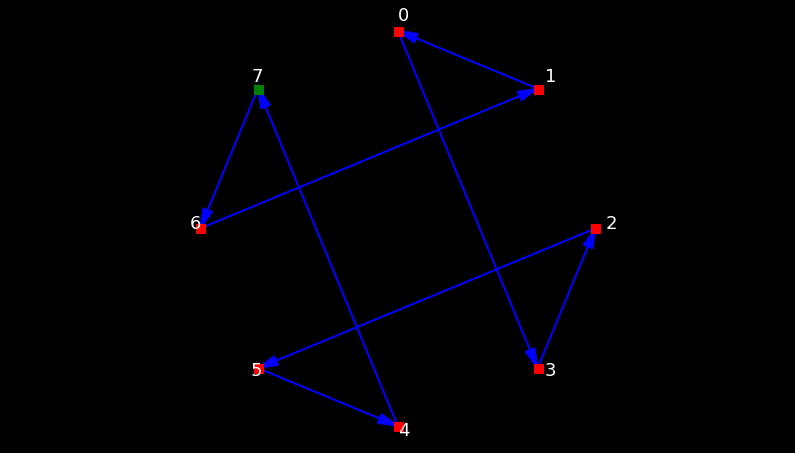

In [27]:
m = 8
a = 5
c = 3
seed = 7

fig = plt.figure(figsize=(14,8))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.axis('equal')
plt.axis('off')
plt.show()

For a 'full-period' LCG, the sequence is the same irrespective of seed. If the period is not full, the sequence (and period) can depend on the seed.

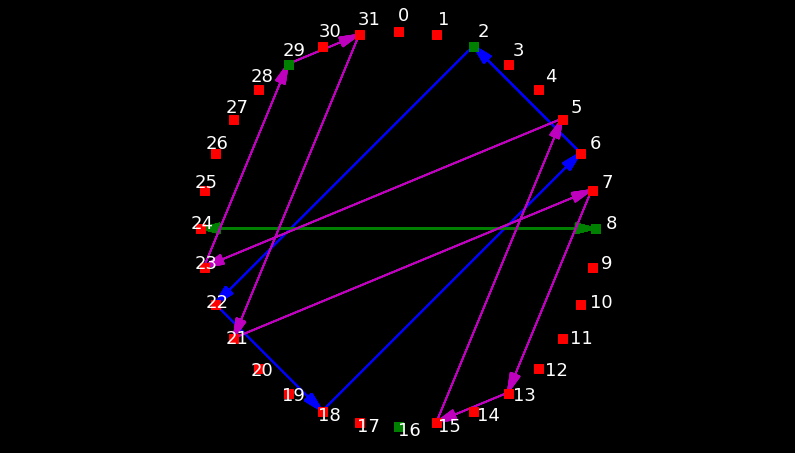

In [33]:
m = 32
a = 11
c = 0

fig = plt.figure(figsize=(14,8))

plot_clock_face(m,fig,annotate = True)

x = LCG(n=m+1,m=m,a=a,c=c,seed=2)
plot_clock_path(m,x,fig,color='b')
x = LCG(n=m+1,m=m,a=a,c=c,seed=8)
plot_clock_path(m,x,fig,color='g')
x = LCG(n=m+1,m=m,a=a,c=c,seed=29)
plot_clock_path(m,x,fig,color='m')
x = LCG(n=m+1,m=m,a=a,c=c,seed=16)
plot_clock_path(m,x,fig,color='c')

plt.axis('equal')
plt.axis('off')
plt.show()

We can animate this to see how things change as we vary $a$ and $c$

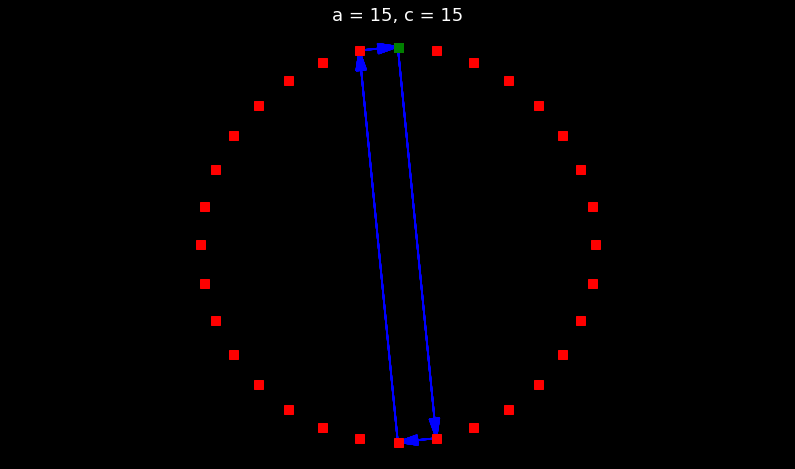

In [37]:
from IPython import display
import time

m = 32
c = 5
a = 1
    
    
for i in range(int(m/2)):
    a = i
    c = i
    display.clear_output(wait=True)
    x = LCG(n=m+1,m=m,a=a,c=c,seed=0)
    fig = plt.figure(figsize=(14,8))
    plot_clock_face(m,fig,annotate = False)
    plot_clock_path(m,x,fig)
    plt.title("a = "+str(a)+", c = "+str(c))
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    time.sleep(1)

#### Basic tests of performance of LCGs

The most basic thing we want to test is that the histogram of the LCG output is close to what we want

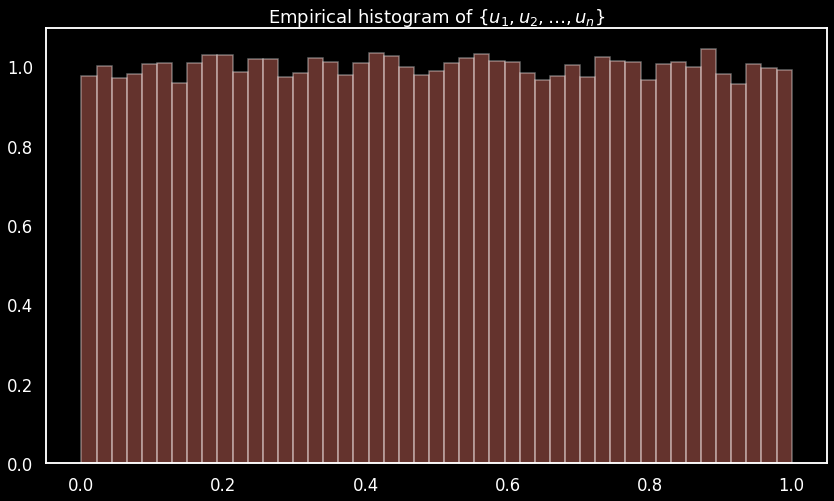

In [41]:
n = 100000

#X = LCG(n,m=2**10,a = 57,c=1)
X = LCG(n)

plt.figure(figsize=(14,8))
sns.distplot(X,kde=False,norm_hist=True,color=cmap(3))
plt.title("Empirical histogram of $\{u_1,u_2,\ldots,u_n\}$")
plt.show()

We can also get a sense of the period of the LCG by looking at a scatter plot of samples

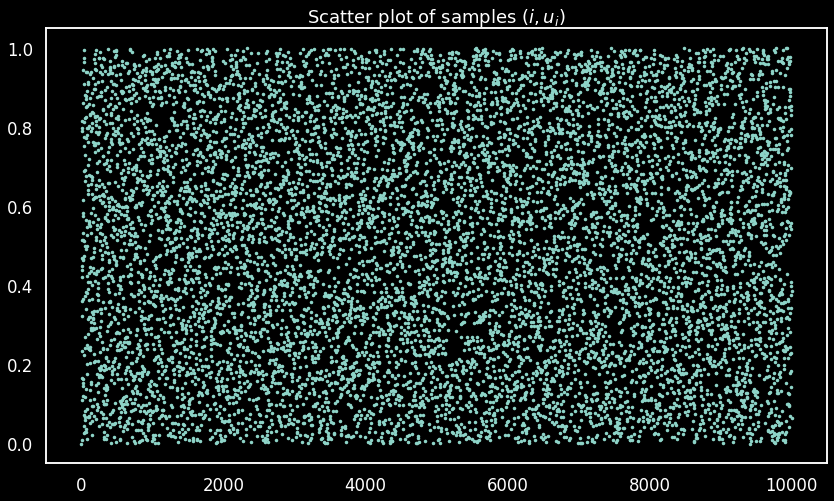

In [42]:
n = 10000
#X = LCG(n,m=2**10,a = 57,c=1)
X = LCG(n)

plt.figure(figsize=(14,8))
plt.scatter(np.arange(n)+1,X,s=4)
plt.title("Scatter plot of samples $(i,u_i)$")
plt.show()

#### Theoretical deficiency of LCGs

The points 
$
(U_0,U_1),~ (U_2,U_3), ~ (U_4,U_5), \ldots
$
lie on a relatively small number of parallel lines 

(Ideal behavior: the points are uniformly distributed in $[0,1]^2$)


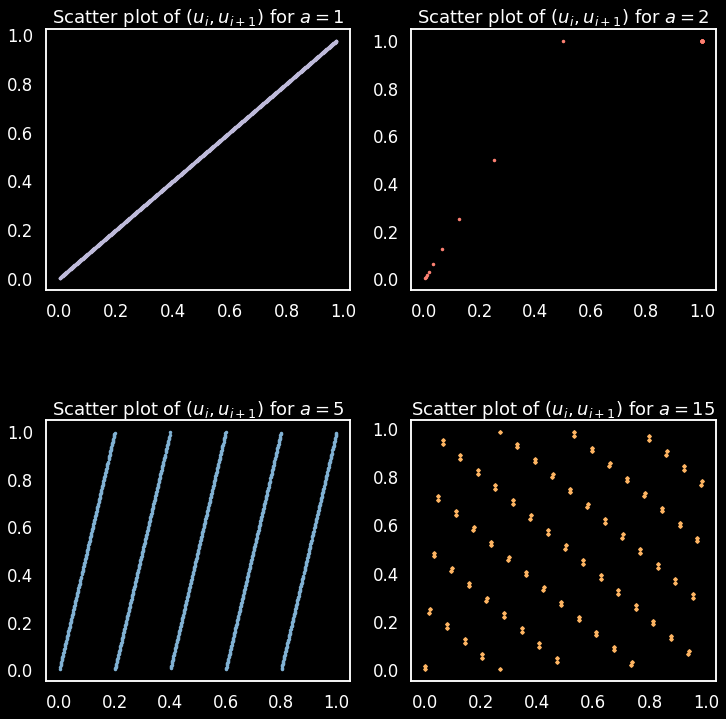

In [46]:
n = 1000

plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.5)
i = 0
for a in [1, 2, 5, 15]:
    i = i+1
    X = LCG(n,m=2**10,a = a,c=1)
    plt.subplot(2,2,i)
    plt.scatter(X[0:-2],X[1:-1],label='a=' + np.str(a),color=cmap(i+1),s=4)
    plt.title("Scatter plot of $(u_i,u_{i+1})$ for $a=$" + str(a))

plt.show()

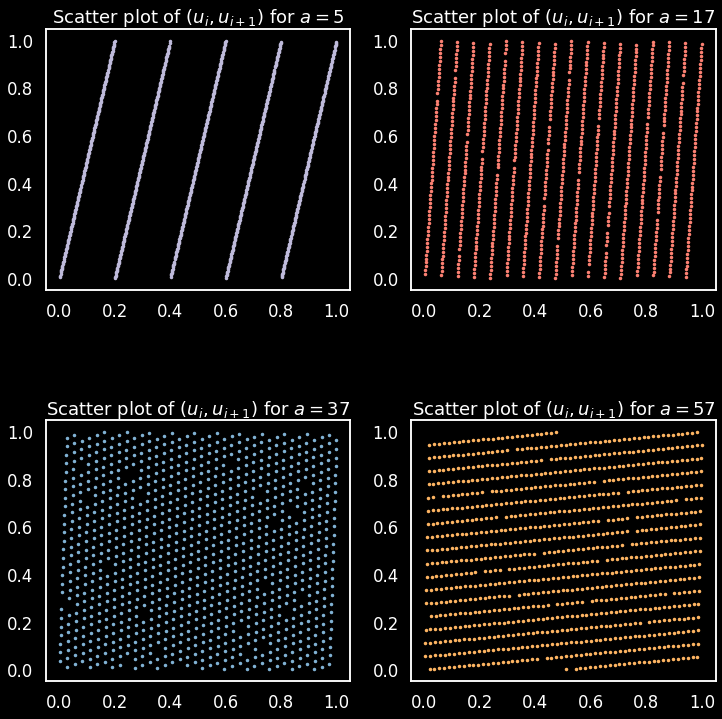

In [47]:
n = 1000

plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.5)
i = 0
for a in [5, 17, 37, 57]:
    i = i+1
    #X = LCG(n,a=a)
    X = LCG(n,m=2**10,a = a,c=1)
    plt.subplot(2,2,i)
    plt.scatter(X[0:-2],X[1:-1],label='a=' + np.str(a),color=cmap(i+1),s=4)
    plt.title("Scatter plot of $(u_i,u_{i+1})$ for $a=$" + str(a))

plt.show()

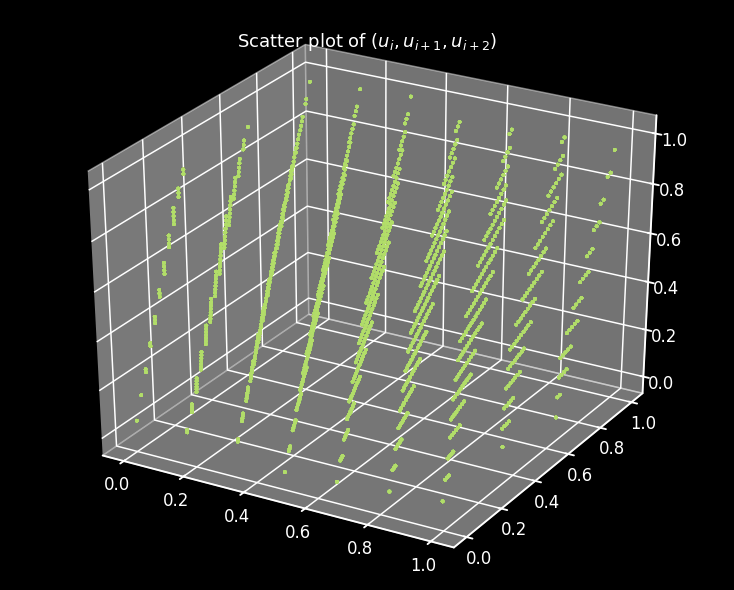

In [50]:
n = 50000
X = LCG(n,m=2**10,a = 57,c=1)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(X[0:-3],X[1:-2],X[2:-1],s=4,color=cmap(6))
plt.title("Scatter plot of $(u_i,u_{i+1},u_{i+2})$")
plt.show()

## Box-Muller method for generating Normal rv

Converting a pair of Uniform$[0,1]$ rv to a pair of Normal $\mathcal{N}(0,1)$ rv via the Box-Muller transform

See https://en.wikipedia.org/wiki/Box_Muller_transform

In [79]:
def BoxMuller(n,rand_gen='default',params={}):
    
    # Generating 2*n Uniform[0,1] random variables
    if rand_gen == 'default':
        u = np.random.rand(2*n)
    elif rand_gen == 'LCG':    
        try:
            u = LCG(2*n,m=params['m'],a=params['a'],c=params['c'],seed=params['seed'])
        except:
            u = LCG(2*n)
    
    # Setting u_1 as the even entries and u_2 as the odd entries of U
    u_1 = u[0::2]
    u_2 = u[1::2]
    
    r = np.sqrt(-2.0*np.log(u_1))
    theta = 2.0*np.pi*u_2
    n_1 = r*np.cos(theta)
    n_2 = r*np.sin(theta)
    return n_1,n_2

Using the Box-Muller method with uniform random numbers from an LCG 

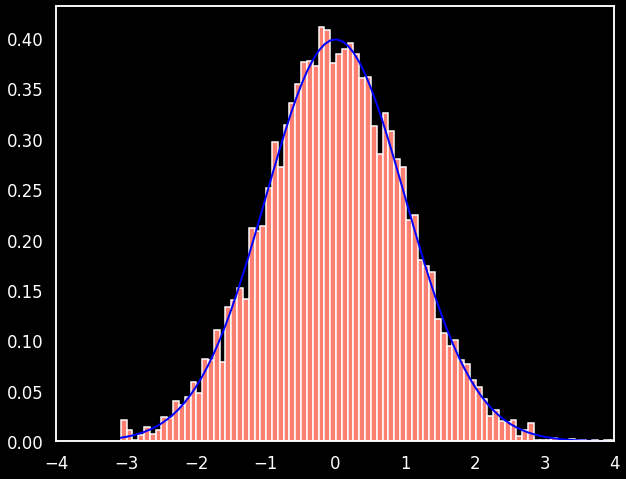

In [97]:
N = 10000
X_1,X_2 = BoxMuller(N,rand_gen='LCG',params = {'m':2**20,'a':57,'c':1,'seed':0})
#X_1,X_2 = BoxMuller(N,rand_gen='LCG')

plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(X_1,bins = 100,density=True,color = cmap(3))
y = sc.stats.norm.pdf(bins,0,1) 
plt.xlim(-4,4)
plt.plot(bins, y, 'b', linewidth=2)
plt.show()

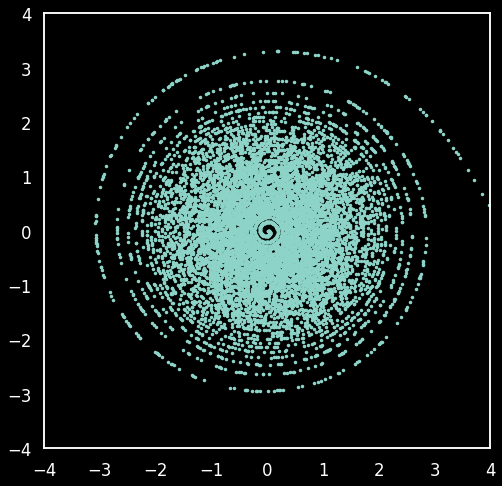

In [98]:
plt.figure(figsize=(8,8))
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.scatter(X_1,X_2,s=4,label='Pair of rv from Box-Muller method')
plt.show()